<a href="https://colab.research.google.com/github/Vinayak0042/IPL-Score-Predictor-using-Deep-Learning/blob/main/IPL_Score_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
# Loading Data
ipl=pd.read_csv("/content/ipl_data.csv")

In [3]:
# Count of rows and columns
ipl.shape

(76014, 15)

In [4]:
# view of dataframe
ipl.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


In [5]:
# dropping unnecessary columns
df=ipl.drop(["mid","date","runs_last_5","wickets_last_5"],axis=1)

In [10]:
# Separating dependent and independent data
X=df.iloc[:,:-1]
y=df["total"]

In [13]:
# Doing Label encoding for categorical varibale like venue, batting_team, bowler_team etc
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()


X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

In [14]:
X.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,striker,non-striker
0,14,6,12,328,201,1,0,0.1,0,0
1,14,6,12,61,201,1,0,0.2,0,0
2,14,6,12,61,201,2,0,0.2,0,0
3,14,6,12,61,201,2,0,0.3,0,0
4,14,6,12,61,201,2,0,0.4,0,0


In [17]:
# Train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=24)

In [21]:
# Scaling to make all numerical variable in one scale
scaler=MinMaxScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)

In [22]:
# Define the neural network model
model = keras.Sequential([
	keras.layers.Input( shape=(X_train_s.shape[1],)),
	keras.layers.Dense(512, activation='relu'),
	keras.layers.Dense(216, activation='relu'),
	keras.layers.Dense(1, activation='linear')
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)
model.compile(optimizer='adam', loss=huber_loss)

In [23]:
# Train the model
model.fit(X_train_s, y_train, epochs=50, batch_size=64, validation_data=(X_test_s, y_test))


Epoch 1/50
832/832 [==============================] - 9s 8ms/step - loss: 26.6348 - val_loss: 15.1241
Epoch 2/50
832/832 [==============================] - 5s 6ms/step - loss: 14.8828 - val_loss: 14.6606
Epoch 3/50
832/832 [==============================] - 4s 5ms/step - loss: 14.6749 - val_loss: 14.4267
Epoch 4/50
832/832 [==============================] - 4s 5ms/step - loss: 14.6539 - val_loss: 14.5045
Epoch 5/50
832/832 [==============================] - 6s 7ms/step - loss: 14.5675 - val_loss: 14.3848
Epoch 6/50
832/832 [==============================] - 4s 5ms/step - loss: 14.5840 - val_loss: 14.3550
Epoch 7/50
832/832 [==============================] - 4s 5ms/step - loss: 14.5348 - val_loss: 14.3709
Epoch 8/50
832/832 [==============================] - 6s 7ms/step - loss: 14.5511 - val_loss: 14.3650
Epoch 9/50
832/832 [==============================] - 4s 5ms/step - loss: 14.5043 - val_loss: 14.4341
Epoch 10/50
832/832 [==============================] - 4s 5ms/step - loss: 14.5143

<Axes: >

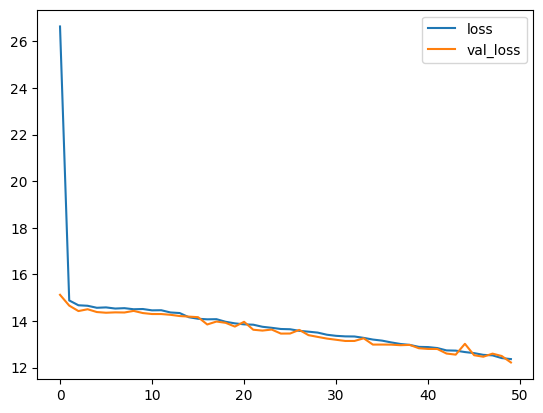

In [24]:
# Plotting loss graph
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [26]:
# Getting sccore for our model
y_pred=model.predict(X_test_s)
mean_absolute_error(y_test,y_pred)

713/713 [==============================] - 1s 2ms/step


12.70868908615129

In [27]:
# Libraries for creating interactive widget
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

In [28]:
venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
	with output:
		clear_output() # Clear the previous output


		# Decode the encoded values back to their original values
		decoded_venue = venue_encoder.transform([venue.value])
		decoded_batting_team = batting_team_encoder.transform([batting_team.value])
		decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
		decoded_striker = striker_encoder.transform([striker.value])
		decoded_bowler = bowler_encoder.transform([bowler.value])


		input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
		input = input.reshape(1,5)
		input = scaler.transform(input)
		#print(input)
		predicted_score = model.predict(input)
		predicted_score = int(predicted_score[0,0])

		print(predicted_score)


In [29]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()